In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from src.fingerflow.extractor import Extractor

extractor = Extractor('models/CoarseNet.h5', 'models/FineNet.h5', 'models/ClassifyNet_6_classes.h5', 'models/CoreNet.weights')

2025-10-08 02:32:49.232180: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-08 02:32:49.301498: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-08 02:32:51.354218: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-08 02:32:52.126423: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Loading FineNet weights from models/FineNet.h5
Loading ClassifyNet weights from models/ClassifyNet_6_classes.h5


/home/tourmii/Documents/Projects/fingerflow/.venv/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


nms iou: 0.413 score: 0.3
all weights read
Core net weights loaded from models/CoreNet.weights


In [2]:
image = cv2.imread('sample/sample_fingerprint.tif')
extracted_minutiae = extractor.extract_minutiae(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/

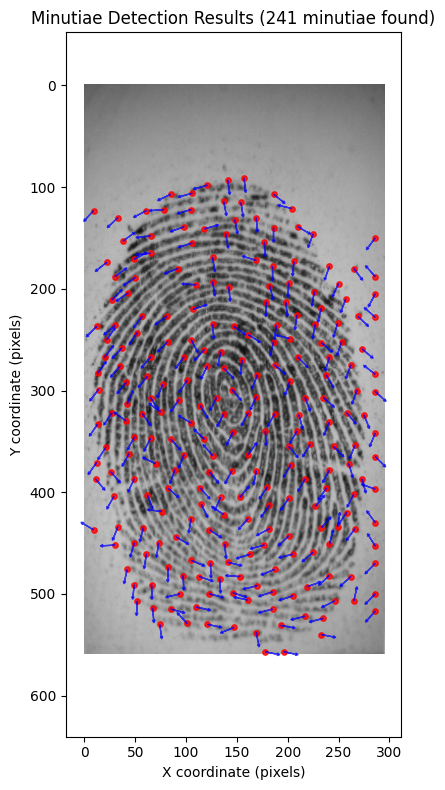

Image dimensions: 296 x 560
Total minutiae detected: 241
Minutiae coordinate ranges: X[9.0, 286.0], Y[91.0, 557.0]
Available columns: ['x', 'y', 'angle', 'score', 'class']
Angle range: [0.183, 6.012] radians


In [3]:
height, width = image.shape[:2]
aspect_ratio = width / height

plt.figure(figsize=(8 * aspect_ratio, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), aspect='equal')

minutiae_df = extracted_minutiae['minutiae']

for _, minutia in minutiae_df.iterrows():
    x, y, angle = minutia['x'], minutia['y'], minutia['angle']
    
    plt.scatter(x, y, c='red', s=15, zorder=3, alpha=0.8)
    
    arrow_length = 12
    dx = arrow_length * np.cos(angle)
    dy = arrow_length * np.sin(angle)
    
    plt.arrow(x, y, dx, dy, head_width=2.5, head_length=2.5, 
              fc='blue', ec='blue', alpha=0.7, zorder=4, linewidth=1)

plt.title(f'Minutiae Detection Results ({len(minutiae_df)} minutiae found)')
plt.xlabel('X coordinate (pixels)')
plt.ylabel('Y coordinate (pixels)')

plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"Image dimensions: {width} x {height}")
print(f"Total minutiae detected: {len(minutiae_df)}")
print(f"Minutiae coordinate ranges: X[{minutiae_df['x'].min():.1f}, {minutiae_df['x'].max():.1f}], Y[{minutiae_df['y'].min():.1f}, {minutiae_df['y'].max():.1f}]")
print(f"Available columns: {list(minutiae_df.columns)}")
print(f"Angle range: [{minutiae_df['angle'].min():.3f}, {minutiae_df['angle'].max():.3f}] radians")

Applying Otsu thresholding segmentation...
Original minutiae count: 214
Filtered minutiae count: 102
Removed 112 spurious detections (52.3% reduction)


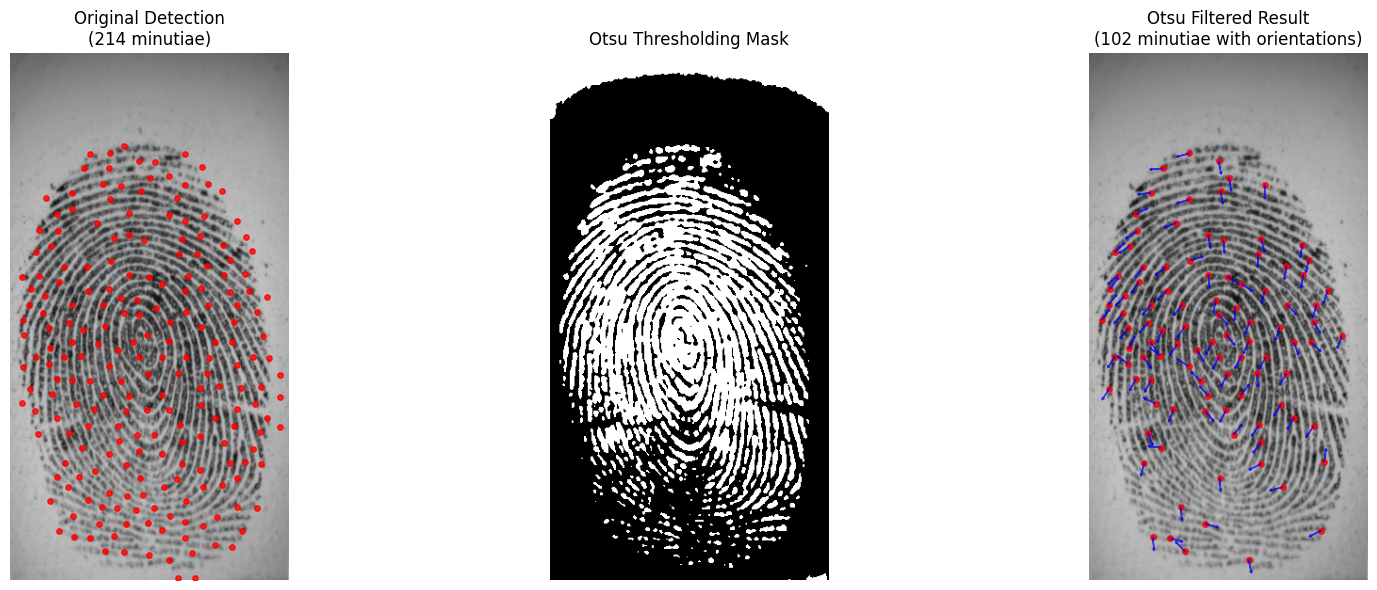


✅ Updated minutiae data with Otsu filtering
📊 Final result: 102 minutiae detected


In [ ]:
import cv2
import numpy as np
import pandas as pd

def filter_minutiae_with_otsu(minutiae_df, image):
    """Filter minutiae using Otsu thresholding segmentation"""
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Apply Gaussian blur and Otsu thresholding
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, otsu_binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    if np.mean(otsu_binary) > 127:
        otsu_binary = 255 - otsu_binary
    
    otsu_mask = otsu_binary > 0
    valid_minutiae = []
    for idx, minutia in minutiae_df.iterrows():
        x, y = int(minutia['x']), int(minutia['y'])
        if (0 <= x < otsu_mask.shape[1] and 0 <= y < otsu_mask.shape[0] and otsu_mask[y, x]):
            valid_minutiae.append(minutia)
    
    filtered_df = pd.DataFrame(valid_minutiae).reset_index(drop=True) if valid_minutiae else pd.DataFrame()
    return filtered_df, otsu_binary

print("Applying Otsu thresholding segmentation...")
original_minutiae = extracted_minutiae['minutiae'].copy()

# Apply Otsu filtering
filtered_minutiae, otsu_mask = filter_minutiae_with_otsu(original_minutiae, image)

reduction_pct = 100 * (len(original_minutiae) - len(filtered_minutiae)) / len(original_minutiae)

print(f"Original minutiae count: {len(original_minutiae)}")
print(f"Filtered minutiae count: {len(filtered_minutiae)}")
print(f"Removed {len(original_minutiae) - len(filtered_minutiae)} spurious detections ({reduction_pct:.1f}% reduction)")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].scatter(original_minutiae['x'], original_minutiae['y'], c='red', s=15, alpha=0.8)
axes[0].set_title(f'Original Detection\n({len(original_minutiae)} minutiae)')
axes[0].axis('off')

# Otsu mask
axes[1].imshow(otsu_mask, cmap='gray')
axes[1].set_title('Otsu Thresholding Mask')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if len(filtered_minutiae) > 0:
    axes[2].scatter(filtered_minutiae['x'], filtered_minutiae['y'], c='red', s=15, alpha=0.8)
    # Add orientation arrows
    for _, minutia in filtered_minutiae.iterrows():
        x, y, angle = minutia['x'], minutia['y'], minutia['angle']
        dx = 12 * np.cos(angle)
        dy = 12 * np.sin(angle)
        axes[2].arrow(x, y, dx, dy, head_width=2.5, head_length=2.5, 
                     fc='blue', ec='blue', alpha=0.7, linewidth=1)

axes[2].set_title(f'Otsu Filtered Result\n({len(filtered_minutiae)} minutiae with orientations)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

extracted_minutiae['minutiae'] = filtered_minutiae
print(f"Updated minutiae data with Otsu filtering")
print(f"Final result: {len(filtered_minutiae)} minutiae detected")

Extracted 102 minutiae patches


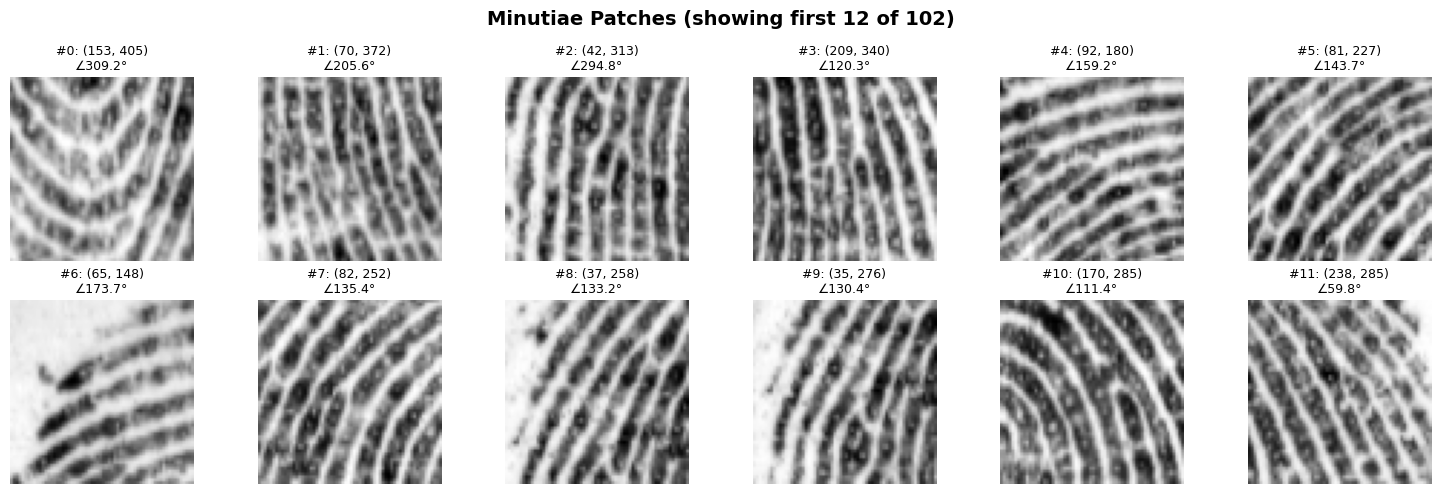

In [ ]:
import os
from pathlib import Path

def extract_minutiae_patches(minutiae_df, image, patch_size=64, output_dir='minutiae_patches'):
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    patches = []
    half_size = patch_size // 2
    
    for idx, minutia in minutiae_df.iterrows():
        x, y = int(minutia['x']), int(minutia['y'])
        angle = minutia['angle']
        
        # Calculate patch boundaries
        x_start = max(0, x - half_size)
        x_end = min(gray.shape[1], x + half_size)
        y_start = max(0, y - half_size)
        y_end = min(gray.shape[0], y + half_size)
        
        # Extract patch
        patch = gray[y_start:y_end, x_start:x_end].copy()
        
        # Pad if patch is at boundary
        if patch.shape[0] < patch_size or patch.shape[1] < patch_size:
            padded_patch = np.zeros((patch_size, patch_size), dtype=patch.dtype)
            pad_y = (patch_size - patch.shape[0]) // 2
            pad_x = (patch_size - patch.shape[1]) // 2
            padded_patch[pad_y:pad_y+patch.shape[0], pad_x:pad_x+patch.shape[1]] = patch
            patch = padded_patch
        
        # Save clean patch (no annotations)
        filename = f"{output_dir}/minutia_{idx:03d}_x{x}_y{y}_a{angle:.2f}.png"
        cv2.imwrite(filename, patch)
        
        patches.append({
            'index': idx,
            'x': x,
            'y': y,
            'angle': angle,
            'patch': patch,
            'filename': filename
        })
    
    return patches

patches = extract_minutiae_patches(filtered_minutiae, image, patch_size=64, output_dir='minutiae_patches')

print(f"Extracted {len(patches)} minutiae patches")

# Visualize first 12 patches
num_display = min(12, len(patches))
if num_display > 0:
    cols = 6
    rows = (num_display + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 2.5))
    axes = axes.flatten() if num_display > 1 else [axes]
    
    for i in range(num_display):
        patch_data = patches[i]
        axes[i].imshow(patch_data['patch'], cmap='gray')
        axes[i].set_title(f"#{patch_data['index']}: ({patch_data['x']}, {patch_data['y']})\n∠{np.degrees(patch_data['angle']):.1f}°", 
                         fontsize=9)
        axes[i].axis('off')
    
    # Hide unused subplots
    for i in range(num_display, len(axes)):
        axes[i].axis('off')
    
    plt.suptitle(f'Minutiae Patches (showing first {num_display} of {len(patches)})', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()